In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


In [2]:
identity=pd.read_csv('D:/kaggle/competitions/ieee-fraud-detection/train_identity.csv')
trans=pd.read_csv('D:/kaggle/competitions/ieee-fraud-detection/train_transaction.csv')

both are connected by transcationID

In [363]:
identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [364]:
trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Transaction table
“It contains money transfer and also other gifting goods and service, like you booked a ticket for others, etc.”

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
“TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.”

TransactionAMT: transaction payment amount in USD
“Some of the transaction amounts have three decimal places to the right of the decimal point. There seems to be a link to three decimal places and a blank addr1 and addr2 field. Is it possible that these are foreign transactions and that, for example, the 75.887 in row 12 is the result of multiplying a foreign currency amount by an exchange rate?”

ProductCD: product code, the product for each transaction
“Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.”

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address
“both addresses are for purchaser
addr1 as billing region
addr2 as billing country”
dist: distance
"distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”
P_ and (R__) emaildomain: purchaser and recipient email domain
“ certain transactions don't need recipient, so R_emaildomain is null.”
C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
“Can you please give more examples of counts in the variables C1-15? Would these be like counts of phone numbers, email addresses, names associated with the user? I can't think of 15.
Your guess is good, plus like device, ipaddr, billingaddr, etc. Also these are for both purchaser and recipient, which doubles the number.”
D1-D15: timedelta, such as days between previous transaction, etc.
M1-M9: match, such as names on card and address, etc.
Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
“For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc.”
"All Vesta features were derived as numerical. some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking). I wouldn't recommend to treat any of them as categorical. If any of them resulted in binary by chance, it maybe worth trying."

Identity Table
Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

DeviceInfo : https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#583227

“id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately.”



In [365]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [366]:
identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

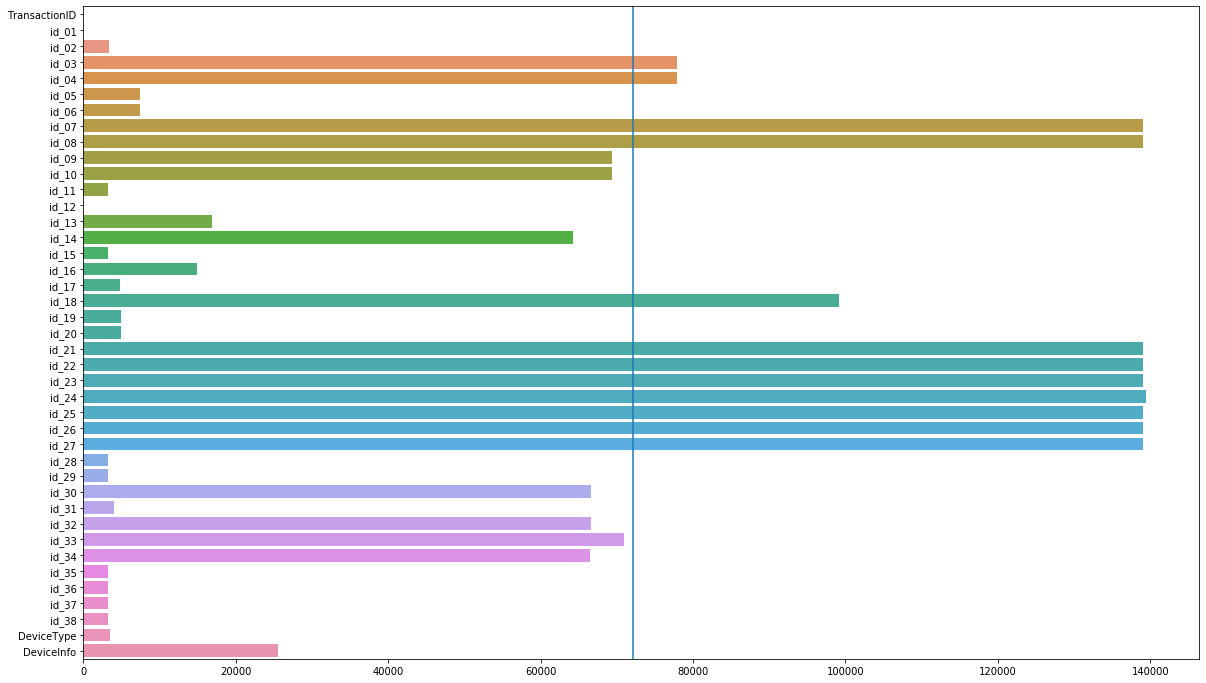

In [367]:
plt.figure(figsize=(20,12))
sn.barplot(identity.isna().sum(),identity.isna().sum().index)
plt.axvline(identity.shape[0]*0.5)

In [368]:
data=pd.DataFrame(identity.isna().sum()/identity.shape[0])

In [369]:
data[data[0]>0.6]

,0
id_07,0.964259
id_08,0.964259
id_18,0.687221
id_21,0.964231
id_22,0.964162
id_23,0.964162
id_24,0.967088
id_25,0.964419
id_26,0.964204
id_27,0.964162


In [370]:
identity.drop([ 'id_07'
               ,'id_08'
               ,'id_18'
               ,'id_21'
               ,'id_22'
               ,'id_23'
               ,'id_24'
               ,'id_25'
               ,'id_26'
               ,'id_27'],inplace=True,axis=1)

<Figure size 1440x1080 with 0 Axes>

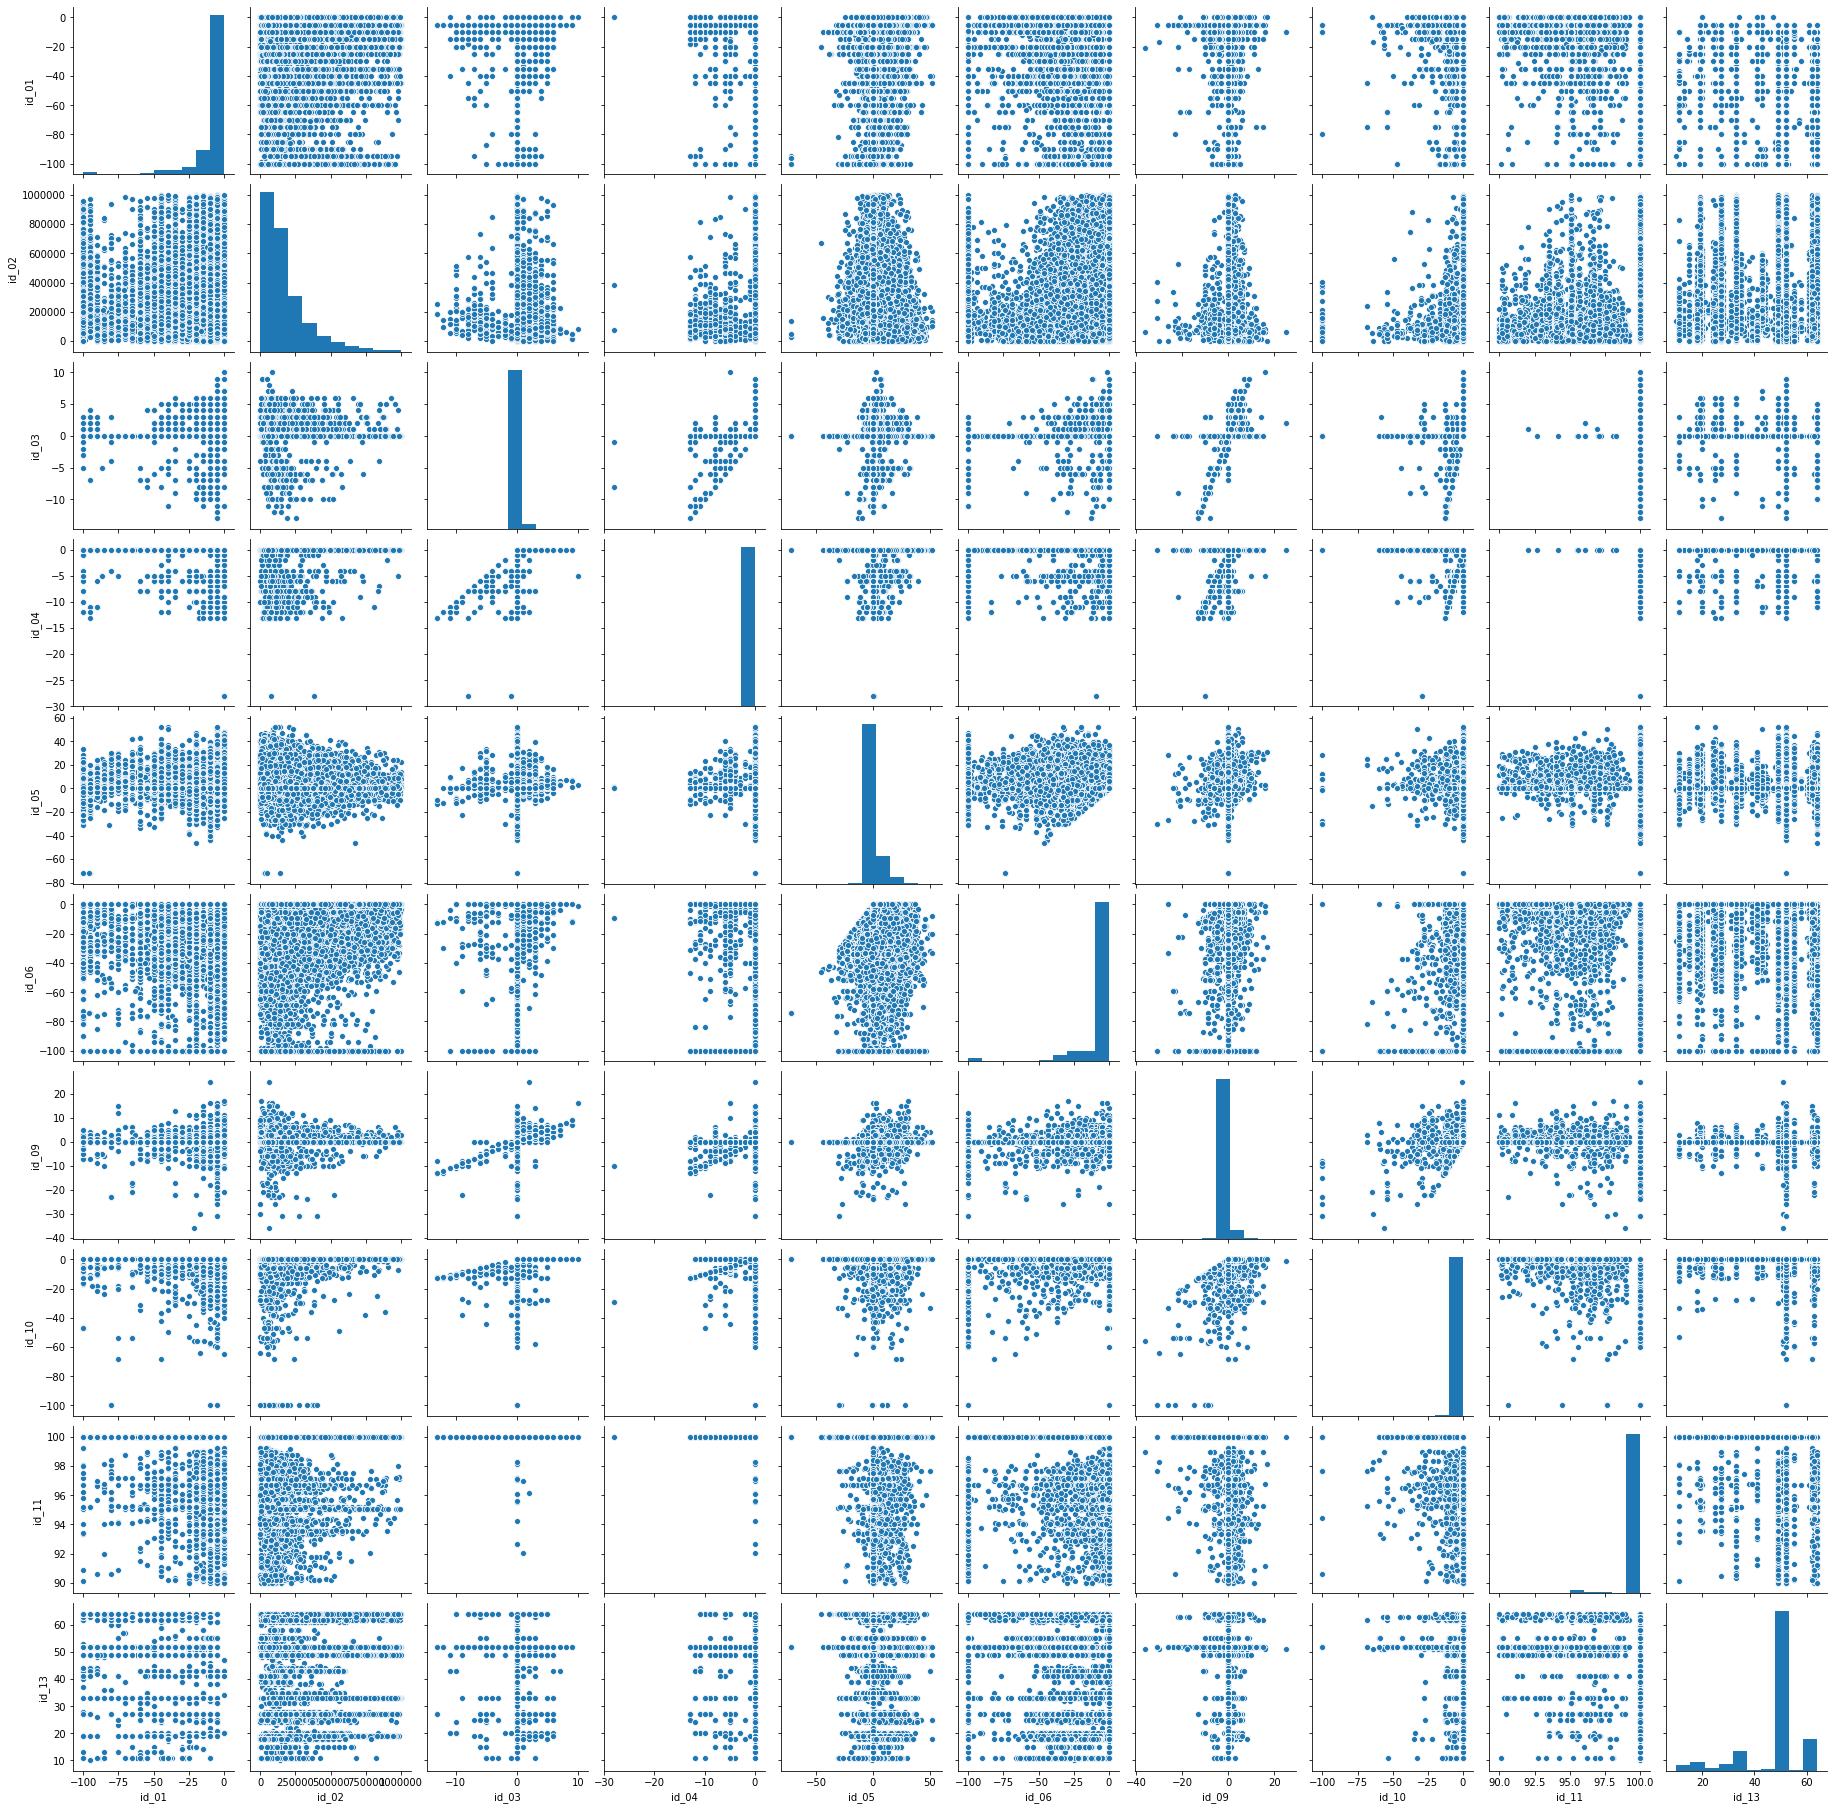

In [371]:
plt.figure(figsize=(20,15))
sn.pairplot(identity.iloc[:,1:12])

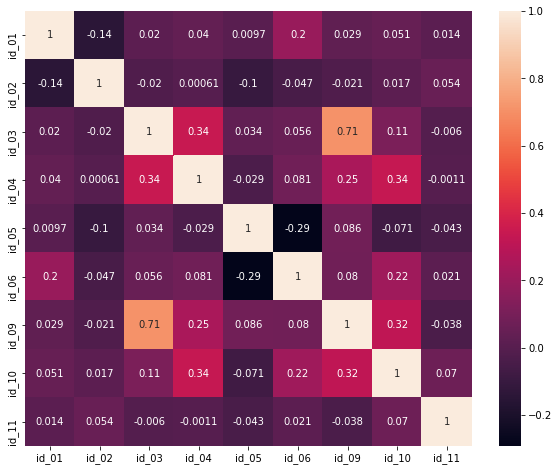

In [372]:
plt.figure(figsize=(10,8))
sn.heatmap(identity[[
    'id_01','id_02','id_03','id_04','id_05','id_06','id_09','id_10','id_11'
]].corr(),annot=True)

In [373]:
identity['id_03'].isna().sum()/identity.shape[0],identity['id_09'].isna().sum()/identity.shape[0]

(0.5401607121809849, 0.4805211012736336)

In [374]:
identity.drop('id_03',axis=1,inplace=True)

In [375]:
identity.head()

,TransactionID,id_01,id_02,id_04,id_05,id_06,id_09,id_10,id_11,id_12,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,0.0,-5.0,NaN,NaN,100.0,NotFound,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,0.0,-6.0,NaN,NaN,100.0,NotFound,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,1.0,0.0,0.0,0.0,100.0,NotFound,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [376]:
from scipy.stats import boxcox

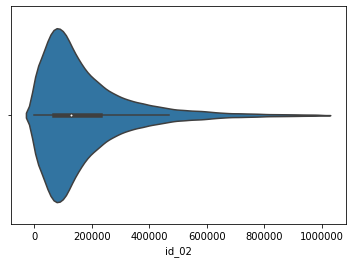

In [377]:
sn.violinplot(identity['id_02'])

In [378]:
identity['id_02'].describe()

count    140872.000000
mean     174716.584708
std      159651.816856
min           1.000000
25%       67992.000000
50%      125800.500000
75%      228749.000000
max      999595.000000
Name: id_02, dtype: float64

In [379]:
identity['id_02'].fillna(value=125800.5,inplace=True)

In [380]:
from statsmodels.api import qqplot

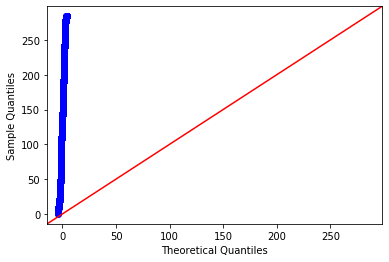

In [381]:
a,_=boxcox(identity['id_02'])
qqplot(a,line='45');

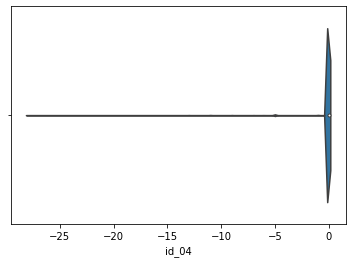

In [382]:
sn.violinplot(identity['id_04'])

In [383]:
identity['id_04'].fillna(value=1,inplace=True)

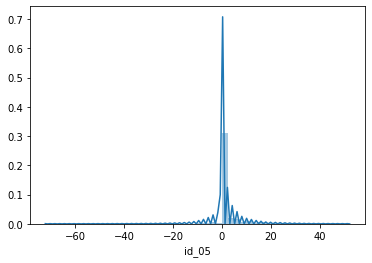

In [384]:
sn.distplot(identity['id_05'])

In [385]:
identity['id_05'].fillna(value=0,inplace=True)

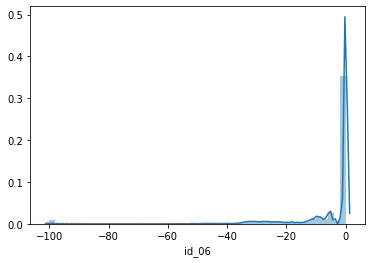

In [386]:
sn.distplot(identity['id_06'])

In [387]:
identity['id_06'].fillna(value=0,inplace=True)

In [388]:
identity['id_09'].isna().sum()/identity.shape[0]

0.4805211012736336

C:\Users\beast brothers\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


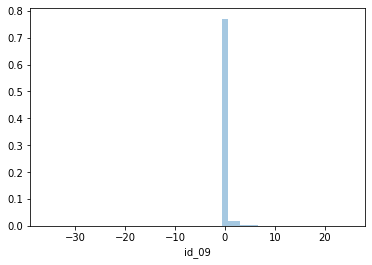

In [389]:
sn.distplot(identity['id_09'])

In [390]:
identity['id_09'].fillna(value=0,inplace=True)

In [391]:
identity['id_10'].isna().sum()/identity.shape[0]


0.4805211012736336

C:\Users\beast brothers\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


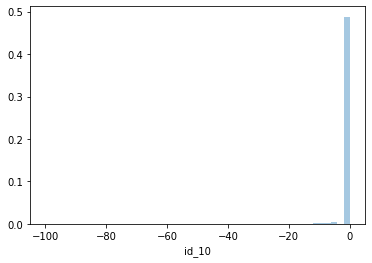

In [392]:
sn.distplot(identity['id_10'])

In [393]:
identity['id_10'].describe()

count    74926.000000
mean        -0.301124
std          2.789446
min       -100.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: id_10, dtype: float64

In [394]:
identity['id_10'].fillna(value=0,inplace=True)

In [395]:
identity['id_11'].isna().sum()/identity.shape[0]

0.02256765095366525

In [396]:
identity['id_11'].describe()

count    140978.000000
mean         99.745325
std           1.127602
min          90.000000
25%         100.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: id_11, dtype: float64

In [397]:
identity['id_11'].fillna(value=100,inplace=True)

In [398]:
identity['id_12'].nunique()

2

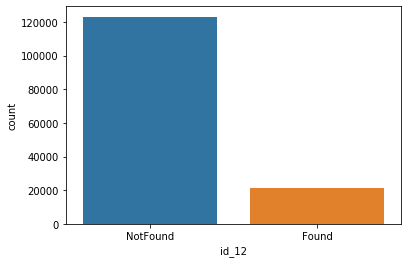

In [399]:
sn.countplot(identity['id_12'])

In [400]:
identity['id_12']=identity['id_12'].apply(lambda x: x+'id_12')

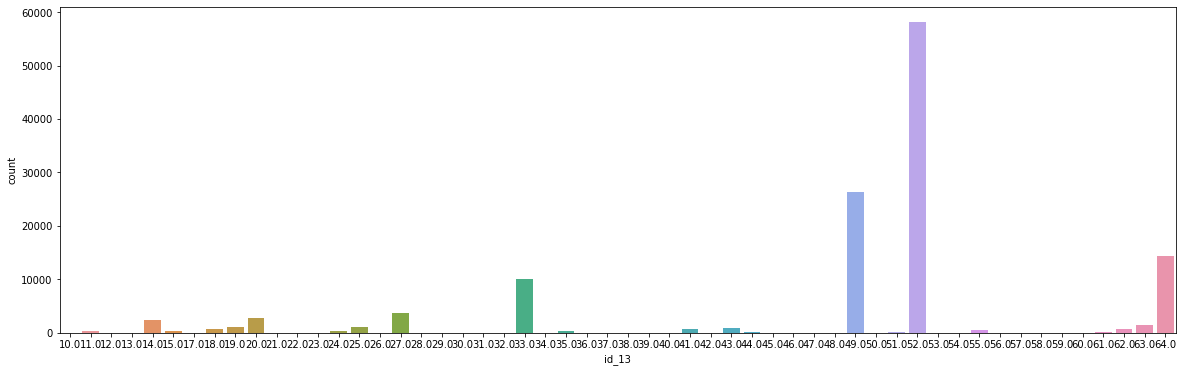

In [401]:
plt.figure(figsize=(20,6))
sn.countplot(identity['id_13'])

In [402]:
data=pd.DataFrame(identity['id_13'].value_counts())
data=data[data['id_13']>10000]
final_cols=list(data.index)
identity['id_13']=identity['id_13'].apply(lambda x:x if x in final_cols else 'other_id_13')

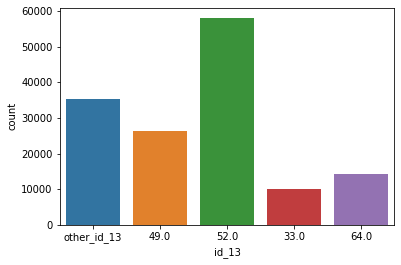

In [403]:
sn.countplot(identity['id_13'])

In [404]:
identity['id_13']=identity['id_13'].apply(lambda x: str(x)+'id_13')

In [405]:
identity['id_14'].nunique()

25

In [406]:
cat_cols=['id_14', 'id_15', 'id_16', 'id_17',
       'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo']

In [407]:
for col in cat_cols:
    print(f"{col} has {identity[col].nunique()} unique values\n")

id_14 has 25 unique values

id_15 has 3 unique values

id_16 has 2 unique values

id_17 has 104 unique values

id_19 has 522 unique values

id_20 has 394 unique values

id_28 has 2 unique values

id_29 has 2 unique values

id_30 has 75 unique values

id_31 has 130 unique values

id_32 has 4 unique values

id_33 has 260 unique values

id_34 has 4 unique values

id_35 has 2 unique values

id_36 has 2 unique values

id_37 has 2 unique values

id_38 has 2 unique values

DeviceType has 2 unique values

DeviceInfo has 1786 unique values



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

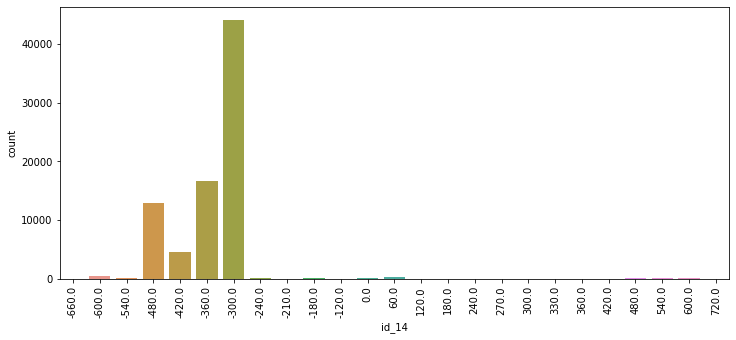

In [408]:
plt.figure(figsize=(12,5))
sn.countplot(identity['id_14'])
plt.xticks(rotation=90)

In [409]:
identity['id_14'].isna().sum()/identity.shape[0]

0.4450368500967185

In [410]:
identity['id_14'].fillna(value='missing_id_14',inplace=True)

In [411]:
req_cols=['missing_id_14'
         ,-300.0  
        ,-360.0           
        ,-480.0           
        ,-420.0]

In [412]:
identity['id_14']=identity['id_14'].apply(lambda x:x if x in req_cols else 'others_id_14')

In [413]:
identity['id_14'].value_counts()

missing_id_14    64189
-300.0           44121
-360.0           16661
-480.0           12891
-420.0            4542
others_id_14      1829
Name: id_14, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

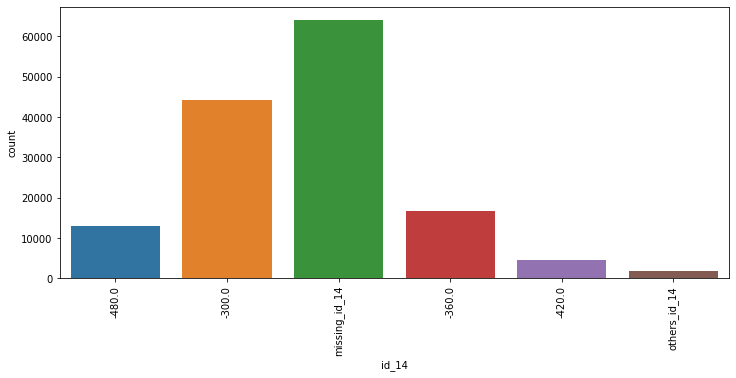

In [414]:
plt.figure(figsize=(12,5))
sn.countplot(identity['id_14'])
plt.xticks(rotation=90)

In [415]:
identity['id_14']=identity['id_14'].apply(lambda x: str(x)+'id_14')

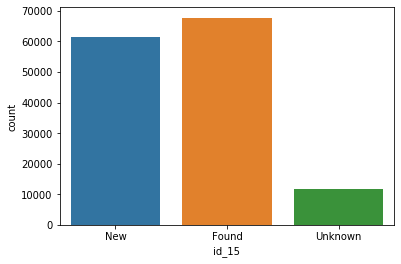

In [416]:
sn.countplot(identity['id_15'])

In [417]:
identity['id_15'].value_counts()

Found      67728
New        61612
Unknown    11645
Name: id_15, dtype: int64

In [418]:
identity['id_15'].fillna(value='Unknown',inplace=True)

In [419]:
identity['id_15']=identity['id_15'].apply(lambda x: str(x)+'id_15')

In [420]:
identity['id_16'].isna().sum()/identity.shape[0]

0.10325653629890524

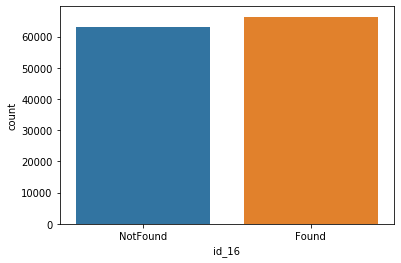

In [421]:
sn.countplot(identity['id_16'])

In [422]:
identity['id_16'].fillna(value='NotFound',inplace=True)

In [423]:
identity['id_16']=identity['id_16'].apply(lambda x: str(x)+'id_16')

In [424]:
identity['id_17'].isna().sum()/identity.shape[0]

0.033723211747658306

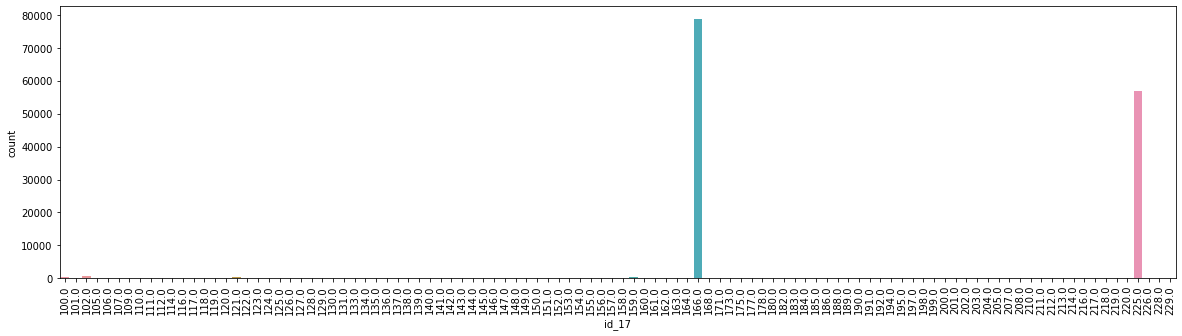

In [425]:
plt.figure(figsize=(20,5))
sn.countplot(identity['id_17'])
plt.xticks(rotation=90)
plt.show()

In [426]:
identity['id_17'].fillna(value=166.0,inplace=True)

In [427]:
req_cols=[166.0,225.0]
identity['id_17']=identity['id_17'].apply(lambda x:x if x in req_cols else 'others_id_17')

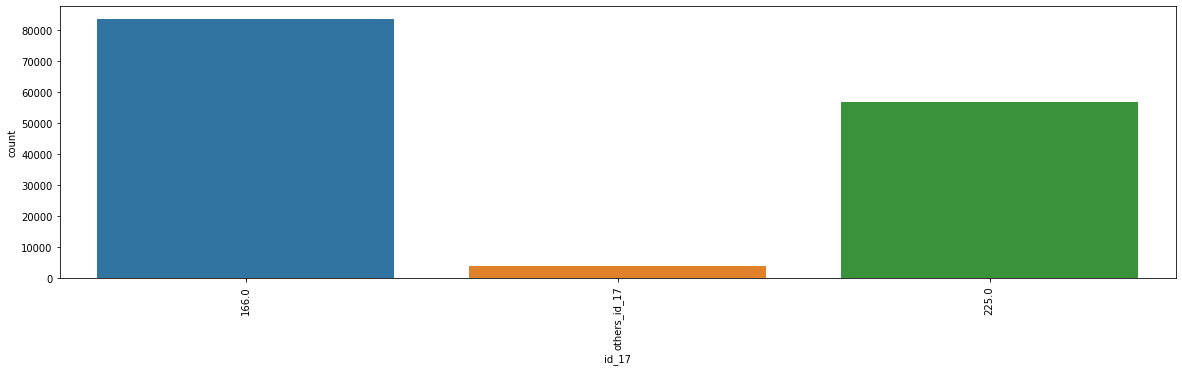

In [428]:
plt.figure(figsize=(20,5))
sn.countplot(identity['id_17'])
plt.xticks(rotation=90)
plt.show()

In [429]:
identity['id_17']=identity['id_17'].apply(lambda x: str(x)+'id_17')

In [430]:
identity['id_19'].isna().sum()/identity.shape[0]

0.034076806278729554

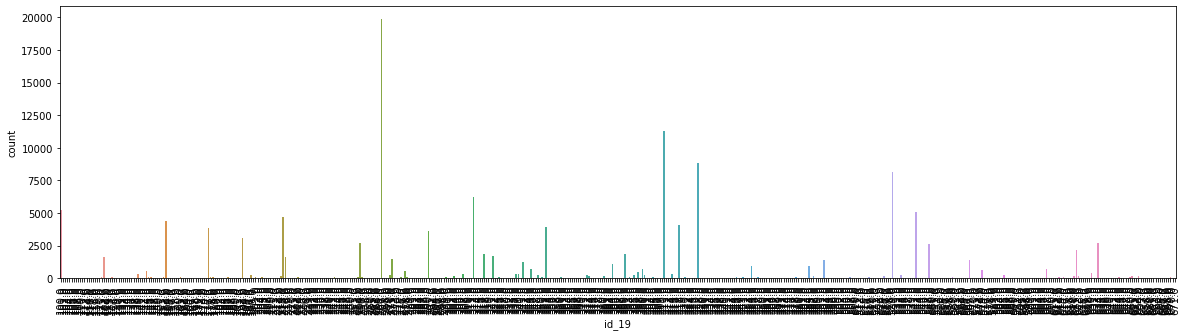

In [431]:
plt.figure(figsize=(20,5))
sn.countplot(identity['id_19'])
plt.xticks(rotation=90)
plt.show()

In [432]:
identity['id_19'].fillna(value=266.0,inplace=True)

In [433]:
data=pd.DataFrame(identity['id_19'].value_counts())
data[data['id_19']>5000]

,id_19
266.0,24764
410.0,11318
427.0,8808
529.0,8122
312.0,6227
100.0,5262
542.0,5116


In [434]:
identity['id_19']=identity['id_19'].apply(lambda x: str(x)+'id19' if x in [266.0
                                                                           ,410.0
                                                                           ,427.0
                                                                           ,529.0
                                                                           ,312.0
                                                                           ,100.0
                                                                           ,542.0] else 'others_id_19')

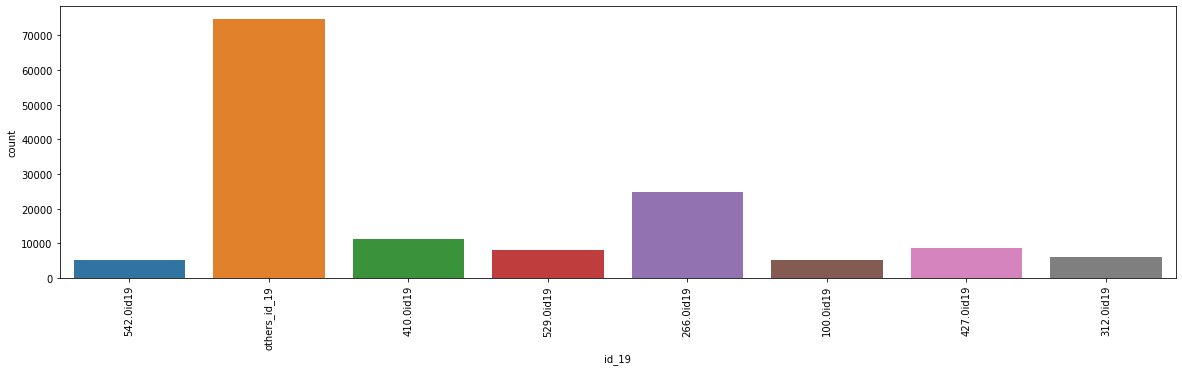

In [435]:
plt.figure(figsize=(20,5))
sn.countplot(identity['id_19'])
plt.xticks(rotation=90)
plt.show()

In [436]:
identity['id_19']=identity['id_19'].apply(lambda x: str(x)+'id_19')

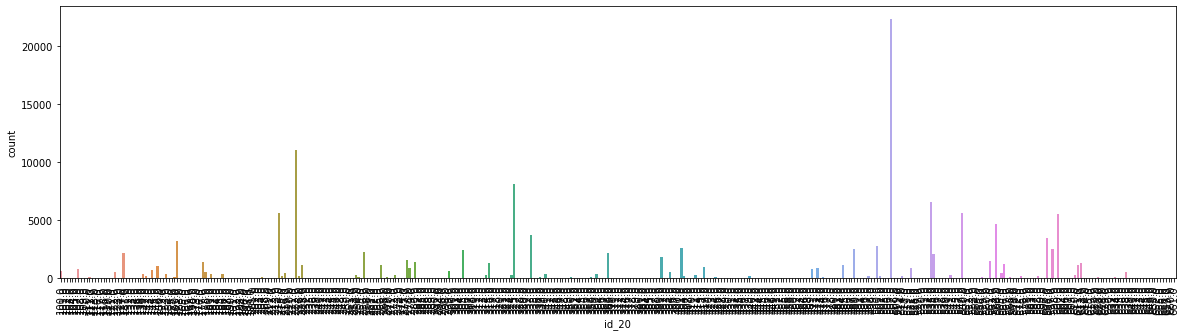

In [437]:
plt.figure(figsize=(20,5))
sn.countplot(identity['id_20'])
plt.xticks(rotation=90)
plt.show()

In [438]:
data=pd.DataFrame(identity['id_20'].value_counts())
data[data['id_20']>5000]

,id_20
507.0,22311
222.0,11065
325.0,8133
533.0,6611
214.0,5664
549.0,5643
600.0,5563


In [439]:
identity['id_20'].fillna(value=507.0,inplace=True)

In [440]:
identity['id_20']=identity['id_20'].apply(lambda x: str(x)+'id20' if x in [507.0
                                                                           ,222.0
                                                                           ,325.0
                                                                           ,533.0
                                                                           ,214.0
                                                                           ,549.0
                                                                           ,600.0] else 'others_id_20')

In [441]:
identity['id_20']=identity['id_20'].apply(lambda x: str(x)+'id_20')

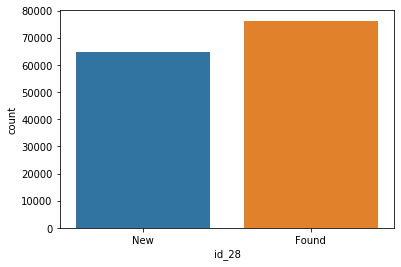

In [442]:
sn.countplot(identity['id_28'])

In [443]:
identity['id_28'].fillna(value='Found',inplace=True)

In [444]:
identity['id_28']=identity['id_28'].apply(lambda x: x+'id28')

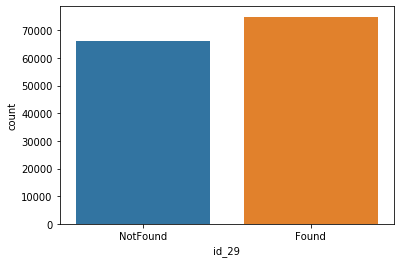

In [445]:
sn.countplot(identity['id_29'])

In [446]:
identity['id_29'].fillna(value='NotFound',inplace=True)

In [447]:
identity['id_29']=identity['id_29'].apply(lambda x: x+'id29')

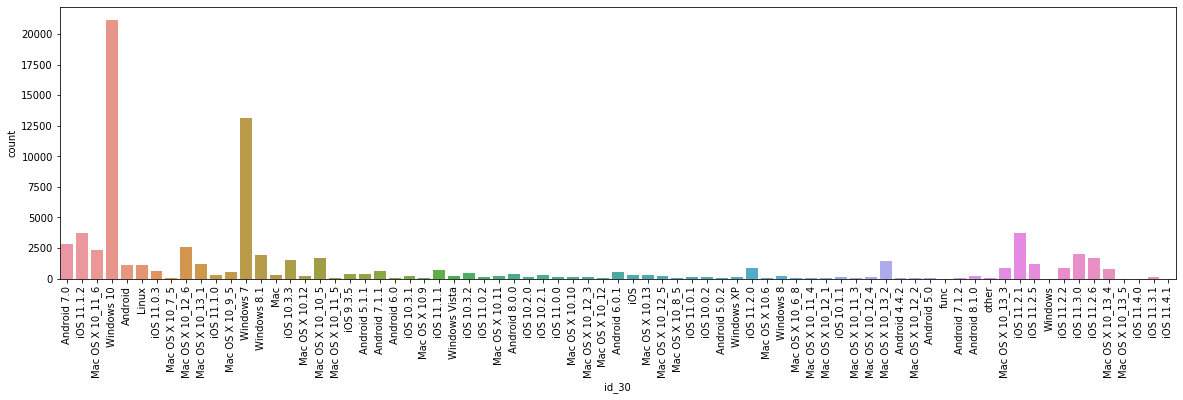

In [448]:
plt.figure(figsize=(20,5))
sn.countplot(identity['id_30'])
plt.xticks(rotation=90)
plt.show()

In [449]:
identity['id_30'].isna().sum()/identity['id_30'].shape[0]

0.46222431759722116

In [450]:
identity['id_30'].fillna(value='missing_id_30',inplace=True)

In [451]:
data=pd.DataFrame(identity['id_30'].value_counts())
data[data['id_30']>2500]

,id_30
missing_id_30,66668
Windows 10,21155
Windows 7,13110
iOS 11.2.1,3722
iOS 11.1.2,3699
Android 7.0,2871
Mac OS X 10_12_6,2559


In [452]:
identity['id_30']=identity['id_30'].apply(lambda x: x+'id30' if x in ['missing_id_30'
                                                                      ,'Windows 10'  
                                                                      ,'Windows 7'   
                                                                      ,'iOS 11.2.1'  
                                                                      ,'iOS 11.1.2'  
                                                                      ,'Android 7.0'    
                                                                      ,'Mac OS X 10_12_6'] else 'others_id_30')

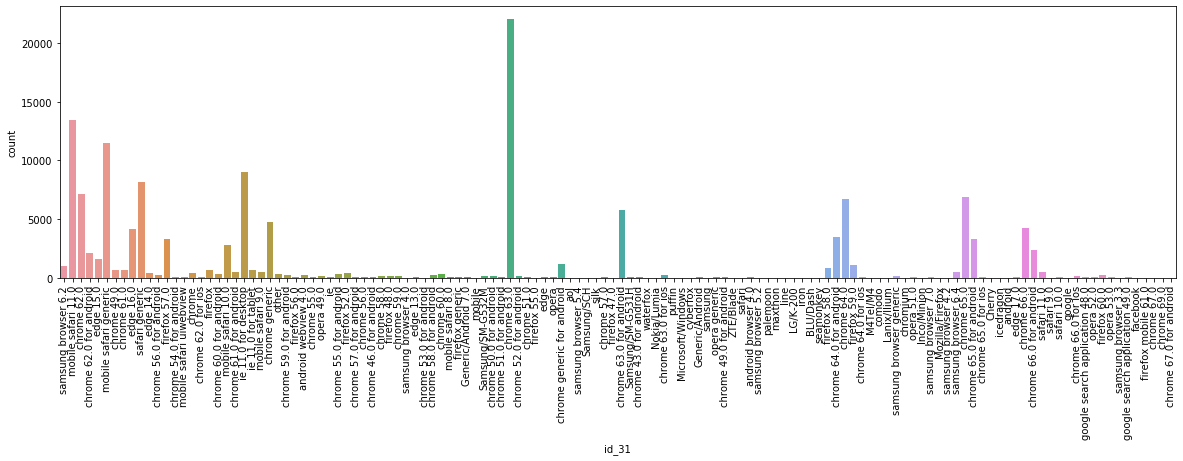

In [453]:
plt.figure(figsize=(20,5))
sn.countplot(identity['id_31'])
plt.xticks(rotation=90)
plt.show()

In [454]:
identity['id_31'].fillna(value='chrome 63.0',inplace=True)

In [455]:
data=pd.DataFrame(identity['id_31'].value_counts())
data[data['id_31']>5000]

,id_31
chrome 63.0,25951
mobile safari 11.0,13423
mobile safari generic,11474
ie 11.0 for desktop,9030
safari generic,8195
chrome 62.0,7182
chrome 65.0,6871
chrome 64.0,6711
chrome 63.0 for android,5806


In [456]:
identity['id_31']=identity['id_31'].apply(lambda x: x+'id31' if x in ['chrome 63.0'
                                                                    ,'mobile safari 11.0'
                                                                       ,'mobile safari generic'
                                                                       ,'ie 11.0 for desktop'
                                                                       ,'safari generic'
                                                                       ,'chrome 62.0'
                                                                       ,'chrome 65.0'
                                                                       ,'chrome 64.0'
                                                                       ,'chrome 63.0 for android'] else 'others_id_31')

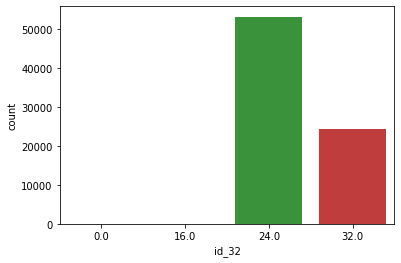

In [457]:

sn.countplot(identity['id_32'])
plt.show()

In [458]:
identity['id_32'].fillna(value='others',inplace=True)

In [459]:
identity['id_32']=identity['id_32'].apply(lambda x:str(x)+'id_32')

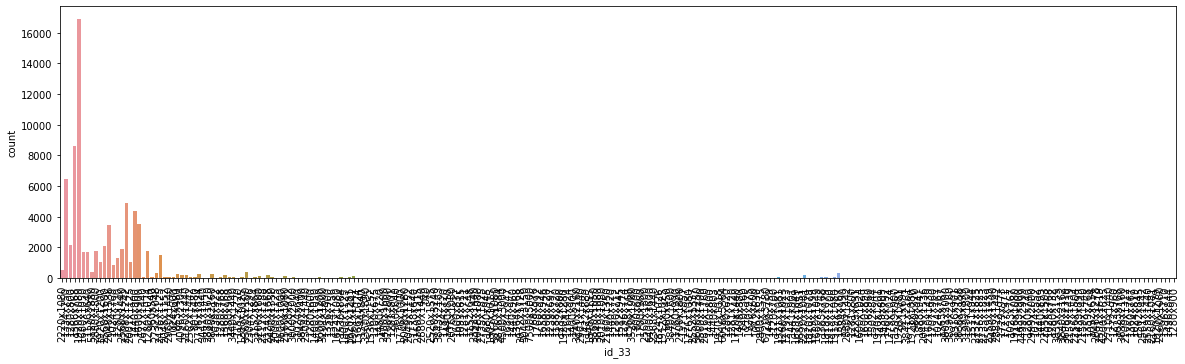

In [460]:
plt.figure(figsize=(20,5))
sn.countplot(identity['id_33'])
plt.xticks(rotation=90)
plt.show()

In [461]:
data=pd.DataFrame(identity['id_33'].value_counts())
data[data['id_33']>4000]

,id_33
1920x1080,16874
1366x768,8605
1334x750,6447
2208x1242,4900
1440x900,4384


In [462]:
identity['id_33'].fillna(value='others',inplace=True)
identity['id_33']=identity['id_33'].apply(lambda x: x+'id33' if x in ['1920x1080'
                                                                     ,'1366x768'
                                                                     ,'1334x750'
                                                                     ,'2208x1242'
                                                                     ,'1440x900','others'] else 'others_id33')

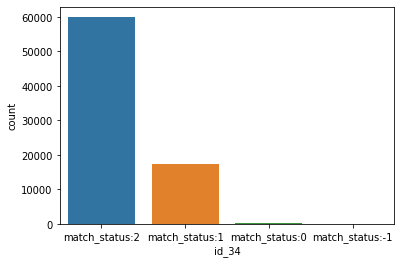

In [463]:

sn.countplot(identity['id_34'])


In [464]:
identity['id_34'].fillna(value='missing_id34',inplace=True)

In [465]:
identity['id_34']=identity['id_34'].apply(lambda x: x+'id34' if x in ['match_status:2'
                                                                     ,'match_status:1'
                                                                     ,'missing_id34'] else 'others_id34')

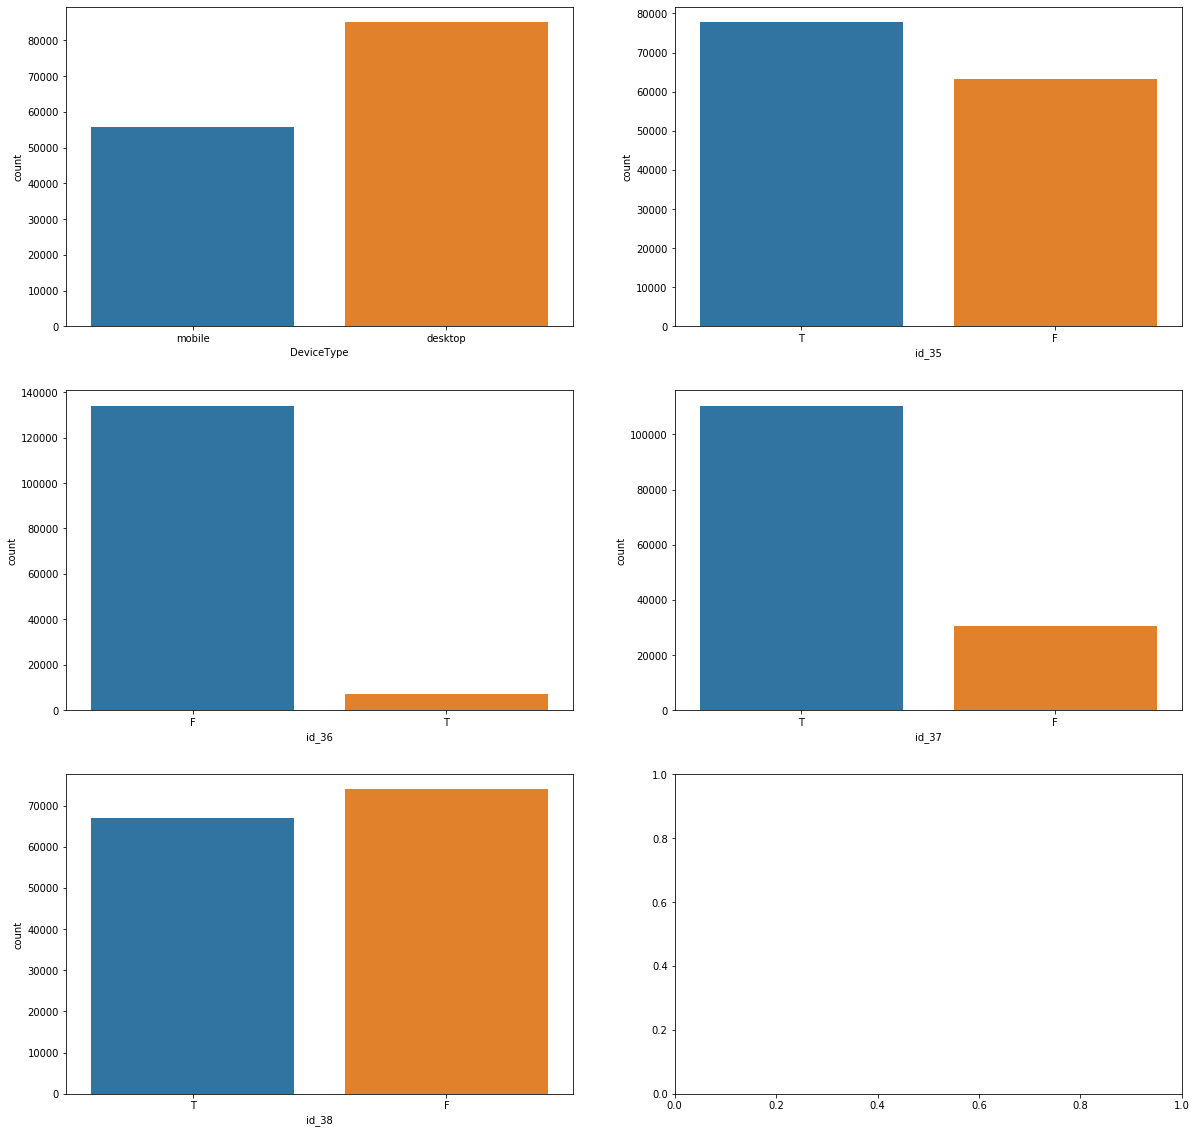

In [466]:
cols=['DeviceType','id_35','id_36','id_37','id_38']
plt.subplots(3,2,figsize=(20,20))
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    sn.countplot(identity[col])

In [467]:
identity['id_35'].fillna(value="T",inplace=True)
identity['id_36'].fillna(value="F",inplace=True)
identity['id_37'].fillna(value="T",inplace=True)
identity['id_38'].fillna(value="T",inplace=True)
identity['DeviceType'].fillna(value='desktop',inplace=True)

In [468]:
identity['id_35']=identity['id_35'].apply(lambda x: x+'id_35')
identity['id_36']=identity['id_36'].apply(lambda x: x+'id_36')
identity['id_37']=identity['id_37'].apply(lambda x: x+'id_37')
identity['id_38']=identity['id_38'].apply(lambda x: x+'id_38')

In [469]:
identity.drop('DeviceInfo',axis=1,inplace=True)

In [470]:
identity.head()

,TransactionID,id_01,id_02,id_04,id_05,id_06,id_09,id_10,id_11,id_12,...,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType
0,2987004,0.0,70787.0,1.0,0.0,0.0,0.0,0.0,100.0,NotFoundid_12,...,Android 7.0id30,others_id_31,32.0id_32,others_id33,match_status:2id34,Tid_35,Fid_36,Tid_37,Tid_38,mobile
1,2987008,-5.0,98945.0,1.0,0.0,-5.0,0.0,0.0,100.0,NotFoundid_12,...,iOS 11.1.2id30,mobile safari 11.0id31,32.0id_32,1334x750id33,match_status:1id34,Tid_35,Fid_36,Fid_37,Tid_38,mobile
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFoundid_12,...,missing_id_30id30,chrome 62.0id31,othersid_32,othersid33,missing_id34id34,Fid_35,Fid_36,Tid_37,Tid_38,desktop
3,2987011,-5.0,221832.0,1.0,0.0,-6.0,0.0,0.0,100.0,NotFoundid_12,...,missing_id_30id30,chrome 62.0id31,othersid_32,othersid33,missing_id34id34,Fid_35,Fid_36,Tid_37,Tid_38,desktop
4,2987016,0.0,7460.0,0.0,1.0,0.0,0.0,0.0,100.0,NotFoundid_12,...,others_id_30,chrome 62.0id31,24.0id_32,others_id33,match_status:2id34,Tid_35,Fid_36,Tid_37,Tid_38,desktop


In [471]:
identity.to_csv('ieefraud_identity.csv',index=False)